In [1]:
#import required libraries
import rasterio
from rasterio import plot
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#import bands as separate 1 band raster
imagePath = './data/raw/S2A_MSIL2A_20220703T084611_N0400_R107_T37VCD_20220703T134122/S2A_MSIL2A_20220703T084611_N0400_R107_T37VCD_20220703T134122.SAFE/GRANULE/L2A_T37VCD_A036712_20220703T085107/IMG_DATA/R10m/'
band2 = rasterio.open(imagePath + 'T37VCD_20220703T084611_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath + 'T37VCD_20220703T084611_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath + 'T37VCD_20220703T084611_B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath + 'T37VCD_20220703T084611_B08_10m.jp2', driver='JP2OpenJPEG') #nir

In [31]:
#number of raster bands
band8.count

1

In [32]:
#number of raster columns
band8.width

10980

In [33]:
#number of raster rows
band8.height

10980

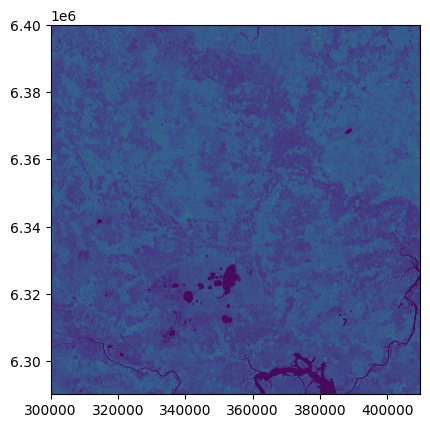

<Axes: >

In [39]:
#plot band 
plot.show(band8)

In [18]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [38]:
#export RGB color image
trueColor = rasterio.open('./data/raw/RGB/Sentinel_RGB.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

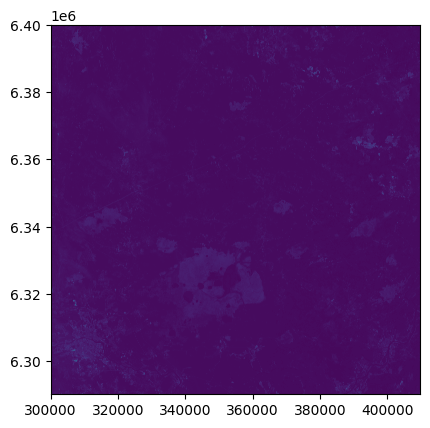

<Axes: >

In [40]:
src = rasterio.open('./data/raw/RGB/Sentinel_RGB.tiff', count=3)
plot.show(src)